<a href="https://colab.research.google.com/github/wanjikunganga/BITCOIN-PRICE-PREDICTION-PROJECT/blob/main/BITCOIN_FINAL_COPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting the Price of Bitcoin**

#**Overview**

Bitcoin is a form of digital currency whose aim is to do away with need for central authorities such as banks.Bitcoin makes use of blockchain technology that supports peer-to-peer transactions between its users through a decentralized network. 

Bitcoin transactions are authenticated through the proof-of-work consensus mechanism, which gives rewards to cryptocurrency miners for validating its transactions.

Bitcoin was launched in 2009 by a anonymous developer known as Satoshi Nakamoto. It was the first, and has remained as the most valuable asset among cryptocurrencies.
Bitcoin is a digital asset that can either be stored in a digital wallet or at a cryptocurrency exchange. Each individual coin represents the value of Bitcoin’s current price in relation to either the US dollar or other world currencies. It's possible to own partial shares of each coin. The smallest unit of each Bitcoin is called a Satoshi. Each Satoshi is equivalent to a hundred millionth of one Bitcoin, so owning fractional shares of Bitcoin is quite common.

Bitcoin is powered by open-source code known as blockchain, which creates a shared public history of transactions organized into "blocks" that are "chained" together to prevent tampering. The technology creates a permanent record of each transaction, and it provides a way for every Bitcoin user to operate with the same understanding of who owns what.

 A Bitcoin wallet contains both a public key and a private key, which work together to allow the owner to initiate and digitally sign transactions. This unlocks the central function of Bitcoin — securely transferring ownership from one user to another. Users on the Bitcoin network verify transactions through a process called mining, which confirms that new transactions are consistent with other transactions completed in the past. This ensures that you can’t spend a Bitcoin you don’t have, or that you have previously spent.

#**Problem Statement**

Despite its popularity, the Bitcoin market is relatively new and has been subject to high volatility. There is a need to understand the factors that drive the price of Bitcoin, and to make predictions about future price movements. The information from our analysis will help potential investors to make sound decisions in regards to buying and selling of bitcoin.

# 1.0 Defining the question

##1.1 Specifying the question

   What will bethe price of bitcoin in the next one year, that is, February, 2024?



##1.2 Defining the metrics of success   

This research will be considered a success when we are able to predict the price of bitcoin by looking at: 
1. Market capitalization: This report will track Bitcoin’s market capitalization over time to determine its overall value in the market.
2. Trading volume: The report will analyze Bitcoin’s Trading volume to determine the level of demand for the currency and its liquidity in the market.
3. Price trends: The report will track Bitcoin’s price over time and identify any significant trends or patterns.


# 2.0 Objectives
## a) Main Objective

Our main objective is to predict the price of bitcoin.



## b) Specific Objectives

1. Identify the trends of bitcoin.
2. Identify the features that have an impact on bitcoin.
3. Identify the highest volume recorded by Bitcoin (USD).
4. Identify the lowest volume recorded by Bitcoin (USD).



# 3.0 Experimental Design

In effort to sync our business objectives and data science, we establish the following goals that will help deliver the above research using data science techniques:

*   Web Scraping : This was done using beautiful soup 
*   Exploratory data analysis : univariate, bivariate and multivariate analysis on the data variables. 
*   Feature Scaling
*   Modeling
*   Hyperparameter Tuning
*   Challenging our model
*   Conclusions and recommendations
*   Deployment 













## 3.1 Data Relevance


This dataset is adapted from the CoinMarketCap website and it contains bitcoins data from April, 2013 to February, 2023.The data can be accessed through this [link](https://coinmarketcap.com/currencies/bitcoin/historical-data/)
The data frame created contains 3585 rows and 7 columns.

The specific features include ;


*   Open: the opening price, the price at which an asset, in this case, Bitcoin, trades at the beginning of the day. (USD).
*   High: the maximum price of the day, the highest price reached by Bitcoin on that day, (USD).
*   Low: the minimum price of the day, the lowest price reached by the Bitcoin on that day, (USD).
*   Close: the closing price, the price at which Bitcoin trades at the end of the day, (USD).
*   Volume: the sum of actual trades made during the day, (USD).
*   Market cap: Market capitalization, the total value of all shares of a company or, in the case of Bitcoin or another cryptocurrency, of all coins in circulation, (USD).
*   Timestamp: date of the record.



# 4.0 Reading the Data

We first import all the libraries that will be used in the notebook.

In [ ]:
# Loading required libraries
from bs4 import BeautifulSoup
import requests
import time
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Scrapping our data from CoinMarketCap

In [ ]:
# Creating a function to get the time

def get_timestamp(datetime: str):
    return int(time.mktime(time.strptime(datetime, '%Y-%m-%d %H:%M:%S')))

# Creating a function to get the data
def get_btc_quotes(start_date: str, end_date: str):
    start = get_timestamp(start_date)
    end = get_timestamp(end_date)
    url = f'https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&time_start={start}&time_end={end}'
    return requests.get(url).json()


data = get_btc_quotes(start_date='2012-12-01 00:00:00',
                      end_date='2023-12-10 00:00:00')



Creating a dataframe from the scrapped data

In [ ]:
# Creating the DataFrame
data_flat = [quote['quote']['USD'] for quote in data['data']['quotes']]
df = pd.DataFrame(data_flat)

print(df)

              open          high           low         close        volume  \
0       134.444000    147.488007    134.000000    144.539993  0.000000e+00   
1       144.000000    146.929993    134.050003    139.000000  0.000000e+00   
2       139.000000    139.889999    107.720001    116.989998  0.000000e+00   
3       116.379997    125.599998     92.281898    105.209999  0.000000e+00   
4       106.250000    108.127998     79.099998     97.750000  0.000000e+00   
...            ...           ...           ...           ...           ...   
3583  24640.027221  25093.055150  24327.641672  24327.641672  2.555511e+10   
3584  24336.623340  25020.459513  23927.909253  24829.147570  2.898738e+10   
3585  24833.048914  25126.851686  24200.364116  24436.354485  3.125210e+10   
3586  24437.418480  24472.339757  23644.317716  24188.842977  3.020000e+10   
3587  24190.718984  24572.089421  23693.919485  23947.492523  3.047626e+10   

        market_cap                 timestamp  
0     1.603769e+

In [ ]:
# Previewing the df
df

,open,high,low,close,volume,market_cap,timestamp
0,134.444000,147.488007,134.000000,144.539993,0.000000e+00,1.603769e+09,2013-04-29T23:59:59.999Z
1,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09,2013-04-30T23:59:59.999Z
2,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09,2013-05-01T23:59:59.999Z
3,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09,2013-05-02T23:59:59.999Z
4,106.250000,108.127998,79.099998,97.750000,0.000000e+00,1.085995e+09,2013-05-03T23:59:59.999Z
...,...,...,...,...,...,...,...
3583,24640.027221,25093.055150,24327.641672,24327.641672,2.555511e+10,4.694315e+11,2023-02-19T23:59:59.999Z
3584,24336.623340,25020.459513,23927.909253,24829.147570,2.898738e+10,4.791324e+11,2023-02-20T23:59:59.999Z
3585,24833.048914,25126.851686,24200.364116,24436.354485,3.125210e+10,4.715777e+11,2023-02-21T23:59:59.999Z
3586,24437.418480,24472.339757,23644.317716,24188.842977,3.020000e+10,4.668214e+11,2023-02-22T23:59:59.999Z


In [ ]:
#checking the shape of the dataframe
df.shape

(3588, 7)

We have 3586 rows and 7 columns in our dataset

In [ ]:
# Checking for missing values
df.isnull().sum()

open          0
high          0
low           0
close         0
volume        0
market_cap    0
timestamp     0
dtype: int64

There is no missing data in our dataframe

In [ ]:
# Checking the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        3588 non-null   float64
 1   high        3588 non-null   float64
 2   low         3588 non-null   float64
 3   close       3588 non-null   float64
 4   volume      3588 non-null   float64
 5   market_cap  3588 non-null   float64
 6   timestamp   3588 non-null   object 
dtypes: float64(6), object(1)
memory usage: 196.3+ KB


The dataframe has 7 columns of which 6 are in float format and 1 is in object format

In [ ]:
#convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df.timestamp).dt.tz_localize(None)

In [ ]:
#checking the format has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   open        3588 non-null   float64       
 1   high        3588 non-null   float64       
 2   low         3588 non-null   float64       
 3   close       3588 non-null   float64       
 4   volume      3588 non-null   float64       
 5   market_cap  3588 non-null   float64       
 6   timestamp   3588 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 196.3 KB


In [ ]:
#converting market_cap to 2 decimal points 
df['market_cap'] = df['market_cap'].apply("{:.02f}".format)

In [ ]:
#converting volume to 2 decimal points 
df['volume'] = df['volume'].apply("{:.02f}".format)

In [ ]:
#checking the values have been changed to 2 decimal points
df.head()

,open,high,low,close,volume,market_cap,timestamp
0,134.444000,147.488007,134.000000,144.539993,0.00,1603768864.50,2013-04-29 23:59:59.999
1,144.000000,146.929993,134.050003,139.000000,0.00,1542813125.00,2013-04-30 23:59:59.999
2,139.000000,139.889999,107.720001,116.989998,0.00,1298954593.75,2013-05-01 23:59:59.999
3,116.379997,125.599998,92.281898,105.209999,0.00,1168517495.25,2013-05-02 23:59:59.999
4,106.250000,108.127998,79.099998,97.750000,0.00,1085995168.75,2013-05-03 23:59:59.999


Change volume and market cap from object to float

In [ ]:
#convert volume column from object to float
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')

In [ ]:
#convert market_cap column from object to float
df['market_cap'] = pd.to_numeric(df['market_cap'], errors='coerce')

In [ ]:
#checking all columns are in their correct format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   open        3588 non-null   float64       
 1   high        3588 non-null   float64       
 2   low         3588 non-null   float64       
 3   close       3588 non-null   float64       
 4   volume      3588 non-null   float64       
 5   market_cap  3588 non-null   float64       
 6   timestamp   3588 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 196.3 KB


In [ ]:
#convert new timestamp to datetime
df['DateTime'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [ ]:
#drop the timestamp column
df.drop('timestamp',axis = 1,inplace = True)

In [ ]:
#Remove time from date and store it in a new column
df['DateTime'] =df.DateTime.dt.date
df.head()

,open,high,low,close,volume,market_cap,DateTime
0,134.444000,147.488007,134.000000,144.539993,0.0,1.603769e+09,2013-04-29
1,144.000000,146.929993,134.050003,139.000000,0.0,1.542813e+09,2013-04-30
2,139.000000,139.889999,107.720001,116.989998,0.0,1.298955e+09,2013-05-01
3,116.379997,125.599998,92.281898,105.209999,0.0,1.168517e+09,2013-05-02
4,106.250000,108.127998,79.099998,97.750000,0.0,1.085995e+09,2013-05-03


In [ ]:
#convert new Datetime to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   open        3588 non-null   float64       
 1   high        3588 non-null   float64       
 2   low         3588 non-null   float64       
 3   close       3588 non-null   float64       
 4   volume      3588 non-null   float64       
 5   market_cap  3588 non-null   float64       
 6   DateTime    3588 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 196.3 KB


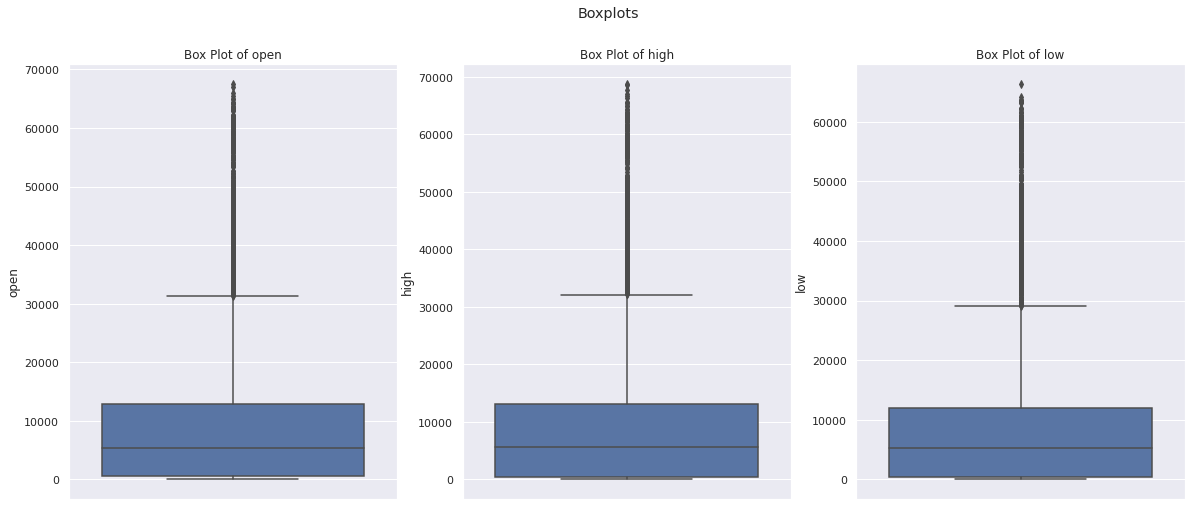

In [ ]:
# Checking for Outliers using boxplots

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=df, y = "open", ax=ax[0])
ax[0].set_title('Box Plot of open')
sns.boxplot(data=df, y = "high", ax=ax[1])
ax[1].set_title('Box Plot of high')
sns.boxplot(data=df, y = "low", ax=ax[2])
ax[2].set_title('Box Plot of low')

plt.show()

The data shows presence of outliers. The outliers indicate that there was a high varying of prices within a short time.

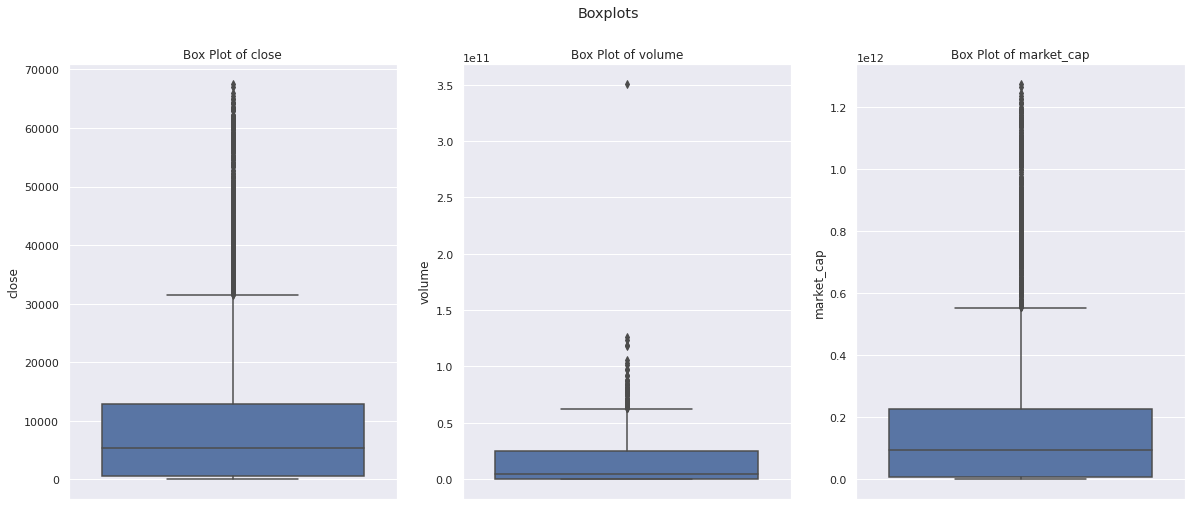

In [ ]:
# Checking for Outliers using boxplots

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=df, y = "close", ax=ax[0])
ax[0].set_title('Box Plot of close')
sns.boxplot(data=df, y = "volume", ax=ax[1])
ax[1].set_title('Box Plot of volume')
sns.boxplot(data=df, y = "market_cap", ax=ax[2])
ax[2].set_title('Box Plot of market_cap')

plt.show()

The data shows presence of outliers. The outliers indicate that there was a high varying of prices within a short time.

# 5.0 Explaratory Data Analysis

###  5.1 Univariate Analysis

Histograms

We plotted histograms to see general distributional features of dataset variables. 

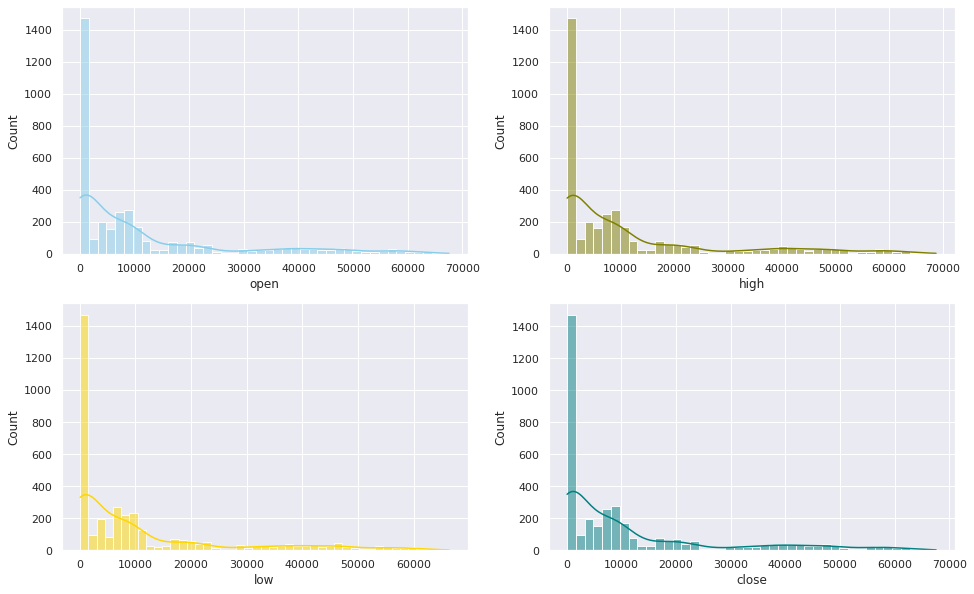

In [ ]:
#histograms for open,high, low and close

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

sns.histplot(data=df, x="open", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="high", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="low", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="close", kde=True, color="teal", ax=axs[1, 1])

plt.show()

The data distribution indicates positive skewness

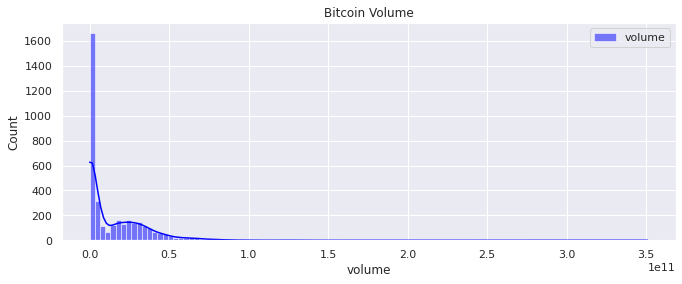

In [ ]:
#histogram for volume

sns.histplot(data=df, x="volume", color="blue", label="volume", kde=True)
figsize=(16, 14)
plt.legend() 
plt.title("Bitcoin Volume")
plt.show()

The data distribution indicates positive skewness

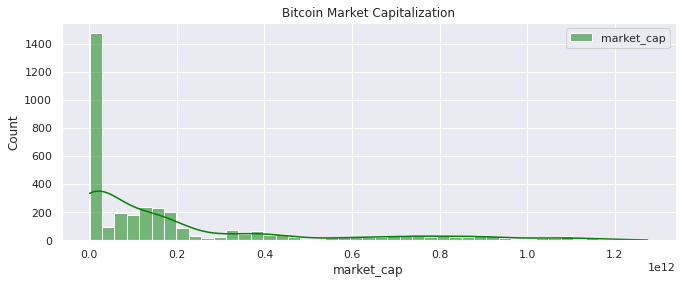

In [ ]:
#histogram for market cap
sns.histplot(data=df, x="market_cap", color="green", label="market_cap", kde=True)
figsize=(16, 14)
plt.legend() 
plt.title("Bitcoin Market Capitalization")
plt.show()

The data distribution indicates positive skewness

## 5.2 Bivariate analysis

Line Graphs

In [ ]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

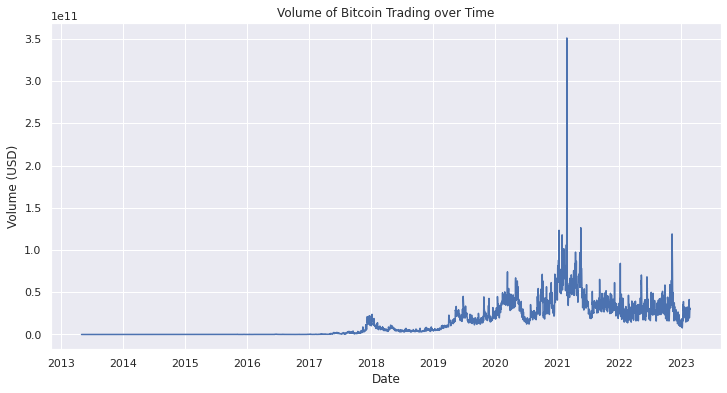

In [ ]:
# Plotting a graph to see the volume

plt.figure(figsize=(12, 6))

plt.plot(df['DateTime'], df['volume'])
plt.title('Volume of Bitcoin Trading over Time')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.show()

We can see that the volume of bitcoin traded has been rising and the highest level reached on first quarter of 2021 being over 35,000,000,000 USD.
The trading volume has reached billions of USD.

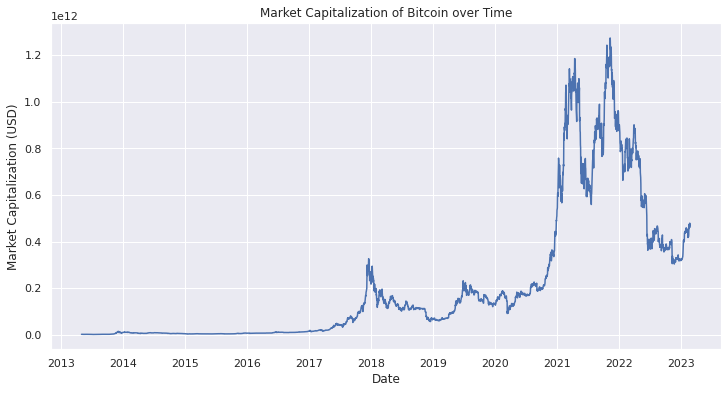

In [ ]:
# Plotting a graph to see the market capitalization of bitcoin over time

plt.figure(figsize=(12, 6))

plt.plot(df['DateTime'], df['market_cap'])
plt.title('Market Capitalization of Bitcoin over Time')
plt.xlabel('Date')
plt.ylabel('Market Capitalization (USD)')
plt.show()

The market capitalization has been rising where the maximum value was realized in 2021 first quarter at around 1,250,000,000,000 (one trillion two hundred and fifty billion eight hundred thirty-one million)
There have been instances when the rise has eased off and declined like in the end of 2018 and on 2020 before rising again and making more highs.


In [ ]:
#in time series the datetime should be set as the index
#set datetime column as index
df= df.set_index('DateTime')
df.head(3)

,open,high,low,close,volume,market_cap
DateTime,,,,,,
2013-04-29,134.444,147.488007,134.000000,144.539993,0.0,1.603769e+09
2013-04-30,144.000,146.929993,134.050003,139.000000,0.0,1.542813e+09
2013-05-01,139.000,139.889999,107.720001,116.989998,0.0,1.298955e+09


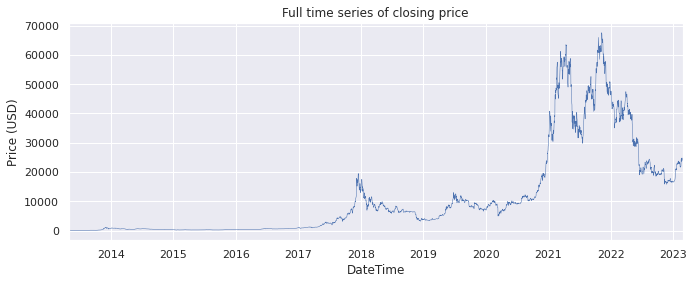

In [ ]:
#Let’s create a line plot of the full time series of Bitcoin close price,
# using the DataFrame’s plot() method.
df['close'].plot(linewidth=0.5)
plt.title('Full time series of closing price')
plt.xlabel('DateTime')
plt.ylabel('Price (USD)')
plt.show()




The line graph shows a slow rise in the price of bitcoin from 2013 to around mid 2017 where it starts rising with the highest prices recorded in mid 2021 and end of 2022 where it starts dropping.



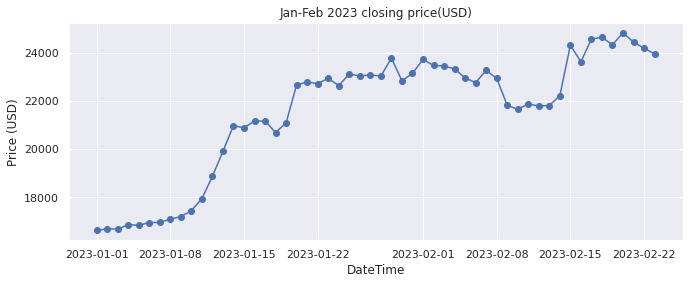

In [ ]:
#Lets now visualize the daily seasonality in closing price in the plot above, 
#it would be nice to have vertical gridlines on a daily time scale

fig, ax = plt.subplots()
ax.plot(df.loc['2023-01':'2023-02', 'close'], marker='o', linestyle='-')
ax.set_ylabel('Daily closing price(USD')
ax.set_title('Jan-Feb 2023 closing price(USD)')
plt.xlabel('DateTime')
plt.ylabel('Price (USD)')
plt.show()

From the daily closing price for the year 2023,we can see that there is a steady increase in closing price as from 1st january 2023 upto around 13th January and 14th and 15th there was a slight decrease

As from 20th January the closing price continued also to increase upto around 26th.A slight decrease was noted at around 27th and 28th of January

Ther is noted also a big drop in closing price as from 8th Feb to 14th february


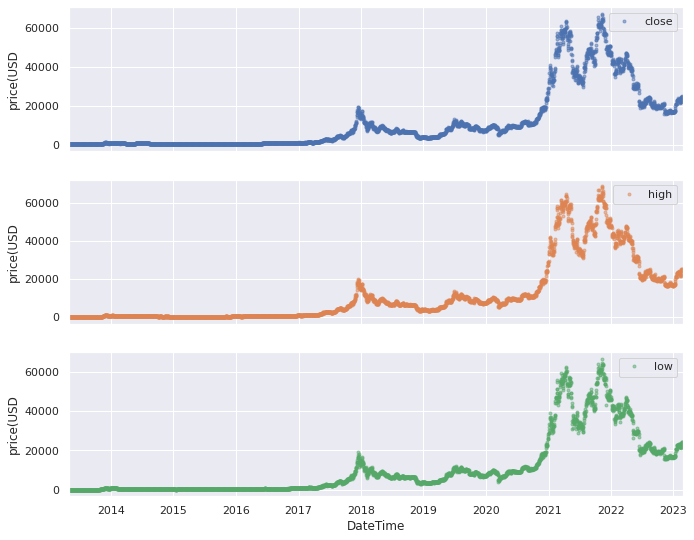

In [ ]:
#checking at the high,close and low bitcoin prices.
cols_plot = ['close', 'high', 'low']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('price(USD')

The high ,low and close bitcoin prices have the similar trends where they rise and fall in a similar manner.

Scatter Plot

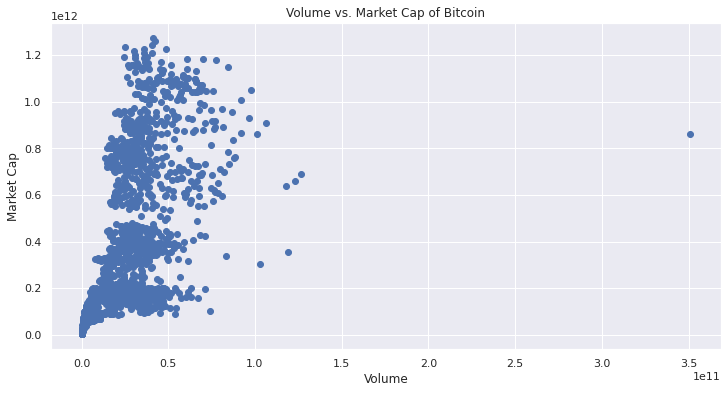

In [ ]:
# Plot scatter the volume of Bitcon data
plt.figure(figsize=(12, 6))

plt.scatter(df['volume'], df['market_cap'])
plt.title('Volume vs. Market Cap of Bitcoin')
plt.xlabel('Volume')
plt.ylabel('Market Cap')
plt.show()


Thera is a positive liner relationship between Voume and Market Capital

## 5.3 Multivariate Analysis

In [ ]:
#cheking summary statistics of our dataframe
df.describe()

,open,high,low,close,volume,market_cap
count,3588.000000,3588.000000,3588.000000,3588.000000,3.588000e+03,3.588000e+03
mean,11234.385146,11516.342797,10922.030793,11239.742912,1.415601e+10,2.078670e+11
std,15542.703148,15938.554880,15087.779876,15539.810521,1.926846e+10,2.937744e+11
min,68.504997,74.561096,65.526001,68.431000,0.000000e+00,7.784112e+08
25%,501.306511,513.946259,484.561996,501.290001,4.527552e+07,6.964153e+09
50%,5392.297613,5591.199912,5253.095202,5401.031250,4.529448e+09,9.448843e+10
75%,12823.526571,13167.337124,11906.546561,12907.284902,2.524367e+10,2.254495e+11
max,67549.735581,68789.625939,66382.061008,67566.830088,3.509679e+11,1.274831e+12


Heat Map


Plotting a heat map to see the correlation between variables.

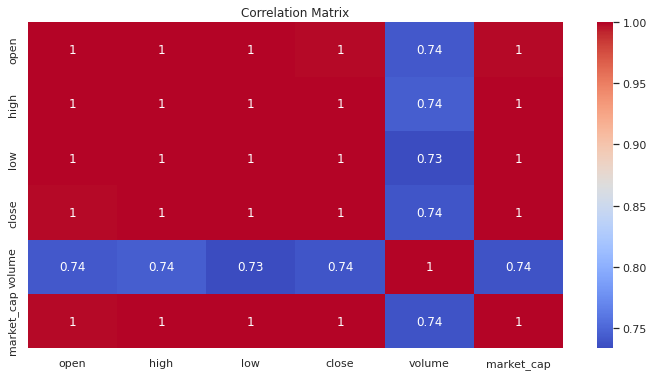

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.title("Correlation Matrix")
plt.show()



From the heat, there is a perfect positive correlation among all the features except for volume which has a strong correlation with the other features. 

# 6.0 Modeling

## 6.1 Feature scalling

In [ ]:
# Normalize the data to help improve the performance of the model
#
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['open','high','low','close','volume','market_cap']] = scaler.fit_transform(df[['open','high','low','close','volume','market_cap']])

## 6.2 Split the data into training and testing sets

The target is defined as the "close" column, and the features are the remaining columns after dropping the "close" column from the dataframe. We then split the data into training and test sets using train_test_split from the sklearn.model_selection module. The data is split into 80% training data (X_train, y_train) and 20% test data (X_test, y_test)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('close',axis=1).values
y = df['close'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
df.head()

,open,high,low,close,volume,market_cap
DateTime,,,,,,
2013-04-29,0.000977,0.001061,0.001033,0.001128,0.0,0.000648
2013-04-30,0.001119,0.001053,0.001033,0.001045,0.0,0.000600
2013-05-01,0.001045,0.000951,0.000636,0.000719,0.0,0.000409
2013-05-02,0.000709,0.000743,0.000403,0.000545,0.0,0.000306
2013-05-03,0.000559,0.000488,0.000205,0.000434,0.0,0.000241


In [ ]:
#Make a copy of the original dataset df with datetime set as index
df1= df.copy()

In [ ]:
#reverse the datetime index and save in a new dataframe df2
df2 = df1.reset_index(drop=False)

In [ ]:
#display df2
df2.head()

,DateTime,open,high,low,close,volume,market_cap
0,2013-04-29,0.000977,0.001061,0.001033,0.001128,0.0,0.000648
1,2013-04-30,0.001119,0.001053,0.001033,0.001045,0.0,0.000600
2,2013-05-01,0.001045,0.000951,0.000636,0.000719,0.0,0.000409
3,2013-05-02,0.000709,0.000743,0.000403,0.000545,0.0,0.000306
4,2013-05-03,0.000559,0.000488,0.000205,0.000434,0.0,0.000241


In [ ]:
#Creating new dataframe of Bitcoin data containing only date and closing price
closedf = df2[['DateTime','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3588, 2)


In [ ]:
#checking our new dataframe

closedf.head()

,DateTime,close
0,2013-04-29,0.001128
1,2013-04-30,0.001045
2,2013-05-01,0.000719
3,2013-05-02,0.000545
4,2013-05-03,0.000434


In [ ]:
#Printing the total data for prediction

closedf = closedf[closedf['DateTime'] > '2013-04-29']
close_price = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  3587


In [ ]:
#deleting datetime columnn to remain with the close column
del closedf['DateTime']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(3587, 1)


**Separating train data from test data**

In [ ]:
#splitting train data from test data

training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2510, 1)
test_data:  (1077, 1)


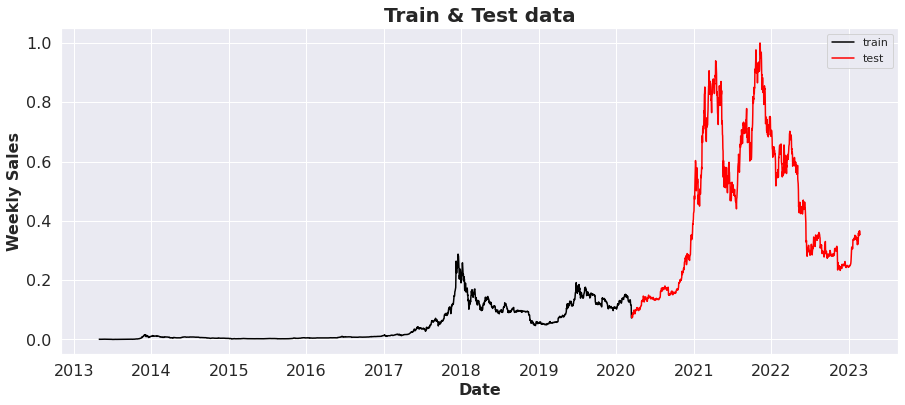

In [ ]:
#making a plot to show our train data and test data

fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_price['DateTime'][:2509], y = close_price['close'][:2509], color = 'black')
sns.lineplot(x = close_price['DateTime'][2509:], y = close_price['close'][2509:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))
plt.show()

From the line graph the train data is from 2013 to early 2020 whereas the test data is from early 2020 to February, 2023.

**Prepare train data for time series analysis**

In [ ]:
 #convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
#stepping back 21 steps
time_step = 21
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_test:  (718, 5)
y_test (718,)
X_train:  (2488, 21)
y_train:  (2488,)


## 6.3 XGBoost

 XGBoost is a robust machine-learning algorithm that can help you understand your data and make better decisions. XGBoost is an implementation of gradient-boosting decision trees. 

In [ ]:
#importing our modeling libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

In [ ]:
# Building the model

my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

[10:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [ ]:
#prediction and model evaluation using MAE and RMSE
import math
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.21352882268525747
Root Mean squared Error - RMSE : 0.3013711638347943


In [ ]:
#checking train data and test data used for prediction
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (2488, 1)
Test data prediction: (1055, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
# shift train predictions for plotting
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


look_back=time_step  # Looking back at the specified number of timesteps
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price',
               'Test predicted close price'])

plotdf = pd.DataFrame({'date': close_price['DateTime'],
                       'original_close': close_price['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3587, 1)
Test predicted data:  (3587, 1)


The original and test predicted closing price are the same until December, 2020.The original close price starts rising 

In [ ]:
#Selectin timestep datapoints from test data 
x_input=test_data[len(test_data)-time_step:].reshape(1,-1) 
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = my_model.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
#Creating arrays of last days and days for prediction
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[22 23 24 25 26 27 28 29 30 31]


In [ ]:
#Initializing the arrays for last original days value and next predicted days value
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(
    closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(
    lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index,
              y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Days'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# Combining the original data with the predicted data
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist()) 
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

#Plotting whole close price with prediction
fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## 6.4 Challenging our model with Lstm


Long Short-Term Memory (LSTM) models are a type of recurrent neural network capable of learning sequences of observations. This makes them a deep learning network well suited for time series forecasting. However, usually a LTSM would struggle with a time series dataset as volatile and unpredictable as Bitcoin. After a grueling process of trying to apply my data, I finally trained the model. In my final fit I used 50 epochs and the “adam” optimizer.

In [ ]:
#importing our libraries
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout,Flatten
from tensorflow.keras import Sequential
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
#loading our dataset
df2.head()

,DateTime,open,high,low,close,volume,market_cap
0,2013-04-29,0.000977,0.001061,0.001033,0.001128,0.0,0.000648
1,2013-04-30,0.001119,0.001053,0.001033,0.001045,0.0,0.000600
2,2013-05-01,0.001045,0.000951,0.000636,0.000719,0.0,0.000409
3,2013-05-02,0.000709,0.000743,0.000403,0.000545,0.0,0.000306
4,2013-05-03,0.000559,0.000488,0.000205,0.000434,0.0,0.000241


In [ ]:
#make another copy
df3=df2.copy()

In [ ]:
#splitting the train data from the test data
price = df3.close
# As usual split data, 70, 30
X = price
size = int(len(X) * 0.7)
train_df, test_df = X[0:size], X[size:len(X)]
training_values = train_df.values
training_values = np.reshape(training_values, (len(training_values), 1))

# Scale the data using minMaxScaler
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)
# assign training values
x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [ ]:
#creating our model
model = Sequential()
model.add(LSTM(10,input_shape = (None,1), activation="relu", return_sequences=True))
model.add(Dense(1))

In [ ]:
#
model.compile(loss="mean_squared_error",optimizer="adam")


In [ ]:
# fit the model to the training data
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
79/79 [==============================] - 2s 2ms/step - loss: 0.0535
Epoch 2/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 3/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 4/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 6/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 7/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 8/50
79/79 [==============================] - 0s 2ms/step - loss: 7.7925e-04
Epoch 9/50
79/79 [==============================] - 0s 2ms/step - loss: 5.2276e-04
Epoch 10/50
79/79 [==============================] - 0s 2ms/step - loss: 4.7179e-04
Epoch 11/50
79/79 [==============================] - 0s 2ms/step - loss: 4.5730e-04
Epoch 12/50
79/79 [==============================] - 0s 2ms/step - loss: 4.4675e-04
Epoch 13/50
79/79 [==========

In [ ]:
# assign test and predicted values + reshaping + converting back from scaler
test_values = test_df.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)

34/34 [==============================] - 0s 1ms/step


In [ ]:
test_df

2511    0.076030
2512    0.078874
2513    0.073277
2514    0.076405
2515    0.076595
          ...   
3583    0.359404
3584    0.366834
3585    0.361015
3586    0.357348
3587    0.353772
Name: close, Length: 1077, dtype: float64

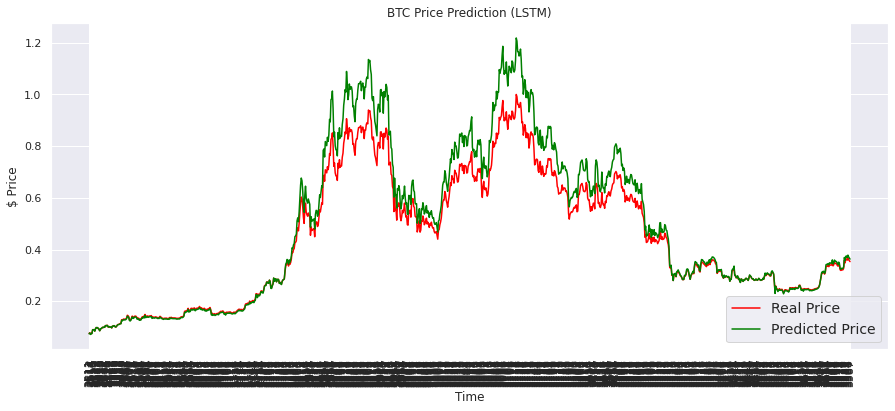

In [ ]:
# plotting the results
plt.figure(figsize=(15, 6))
ax = plt.gca()  
plt.plot(test_df.values, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('BTC Price Prediction (LSTM)')
test_df = test_df.reset_index()
x= test_df.index
labels = test_df['index']
plt.xticks(x, labels, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('$ Price')
plt.legend(loc=4, prop={'size': 14})
plt.show()

In [ ]:
#printing the RMSE results
rmse = np.sqrt(mean_squared_error(test_df.close.values, predicted_price))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.075


After challenging XGBOOST model with LSTM we settled with LSTM since it perfomed better with an RMSE of 0.075

# 7.0 Deploying the Model

In [ ]:
#Saving the model with joblib
import joblib

joblib.dump(test_df, 'test_df.pkl')

['test_df.pkl']

In [ ]:
# Installing fastAPI and uvicorn
!pip install FastAPI -q
!pip install uvicorn -q
!pip install myapp -q

In [ ]:
# Defining the API by creating a script that defines the API, loads the model and specifies the endpoint
# accepts input features and returns predictions

from fastapi import FastAPI
from pydantic import BaseModel
import joblib

app = FastAPI()

class Item(BaseModel):
    open: float
    high: float
    low: float
    volume: float
    market_cap: float

xgb_model = joblib.load('test_df.pkl')

@app.post("/predict")
def predict(item: Item):
    data = [item.open, item.high, item.low, item.volume, item.market_cap]
    pred = test_df.predict([data])[0]
    return {"prediction": pred}

In [ ]:

import subprocess

process = subprocess.Popen(["uvicorn", "app:app", "--reload"])

In [ ]:
process

In [ ]:
# Starting the fastAPI by calling the uvocorn command
#!uvicorn main:app --reload

In [ ]:
# Testing by inputting features
#import requests

#data = {"open": 47000, "high": 50000, "low": 46000, "volume": 1000000, "market_cap": 10000000}
#response = requests.post("http://localhost:8000/predict", json=data)
#print(response.json())

In [ ]:
# Deploying using Google Cloud Run
# Creating a docker file
#FROM tiangolo/uvicorn-gunicorn-fastapi:python3.7

#COPY requirements.txt .
#RUN pip install -r requirements.txt

#COPY app /app

In [ ]:
#buidling the docker image by using the command dockerbuild
# to create a docker image named 'my app'
#docker build -t my-app .

In [ ]:
#Pushing the docker image to a registry Google Container Registry(GCR)
#docker tag my-app gcr.io/[PROJECT-ID]/my-app

In [ ]:
#Replacing [PROJECT-ID] with your Google Cloud project ID. Then, 
#use the docker push command to push the Docker image to GCR
#docker push gcr.io/[PROJECT-ID]/my-app

In [ ]:
#Deploy
# Container image: Set this to the GCR tag of your Docker image (e.g. gcr.io/[PROJECT-ID]/my-app).
#Port: Set this to 8080.
#Authentication: Choose whether to require authentication for your API.

# 8.0  Conclusions

1. Bitcoin has generally been increasing in price, it sometimes falls but it then recovers and continues rising
2. The opening price the high price and the volume together with market 
capitalization affects the price of bitcoin
3. Bitcoin has recorded a volume of zero and has gone to as high as 35,000,000,000

# 9.0 Recommendations

1. For the investors who want to invest in bitcoin, they can invest as the price will rise in the long term.
2. Bitcoin is a good cryptocurrency to invest in as the volume traded and the market capitalization have risen very much making it good to invest in.